In [114]:
# import condas
import numpy as np
from math import *
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams["font.size"] = 15

Consider a network with two parallel links with demand 1, let's investigate the solution properties of the UE problem.

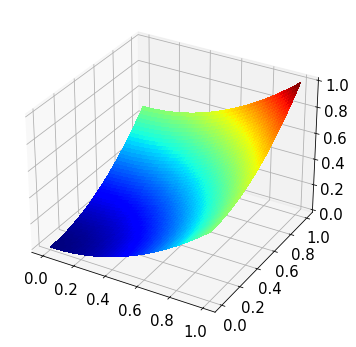

In [115]:
# link cost is positive, continuous, and strictly increasing --> Solution is unique
def t(x):
    return x
def Beckmann(x):
    return 0.5 * x**2

x1 = np.linspace(0, 1, 100)
x2 = 1 - x1
x, y = np.meshgrid(x1, x2)
z = Beckmann(x) + Beckmann(y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z, cmap=plt.cm.jet, linewidth=0, antialiased=False)

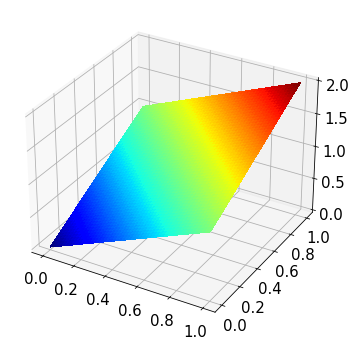

In [116]:
# link cost is positive, continuous, and non-decreasing --> objective value is unique.
def t(x):
    return 1
def Beckmann(x):
    return x

x1 = np.linspace(0, 1, 100)
x2 = 1 - x1
x, y = np.meshgrid(x1, x2)
z = Beckmann(x)+Beckmann(y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z, cmap=plt.cm.jet, linewidth=0, antialiased=False)

Text(0, 0.5, 'Cost')

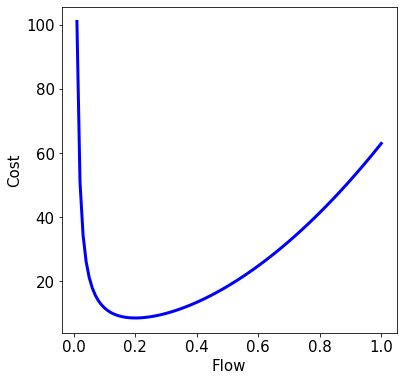

In [117]:
# link cost is positive and continuous --> solution exist but may not unique
def t(x):
    return 1/x + 1 + x + 60 * x**2
def Beckmann(x):
    return np.log(x) + x + 0.5 * x**2 + 20 * x**3

x = np.linspace(0.01, 1, 100)
plt.plot(x, t(x), color='b', linewidth=3)
plt.xlabel("Flow")
plt.ylabel("Cost")

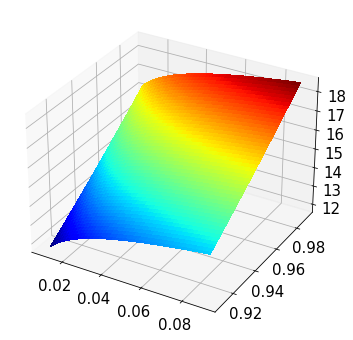

In [118]:
x1 = np.linspace(0.01, 0.09, 100)
x2 = 1 - x1
x, y = np.meshgrid(x1, x2)
z = Beckmann(x) + Beckmann(y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z, cmap=plt.cm.jet, linewidth=0, antialiased=False)

### Emission problem with non-monotone link cost
Tidswell, J., Downward, A., Thielen, C., & Raith, A. (2021). Minimising emissions in traffic assignment with non-monotonic arc costs. Transportation Research Part B: Methodological, 153, 70-90.

In [119]:
# Flow --> time
def BPR(x):
    return 0.1 * (1 + 0.15 * (x/1800)**4)

# Flow --> speed
def v(x):
    dist = 8
    return dist/BPR(x)

# Flow --> emission-minimizing speed
def v_lim(x):
    v_max = 28
    dist = 8
    return np.minimum(v_max, dist/BPR(x))

# Speed --> Emission
def e(v):
    return 2.00/v - 4.49*1e-2 - 3.36*1e-4 * v + 3.49*1e-5 * v**2

Text(0, 0.5, 'Time')

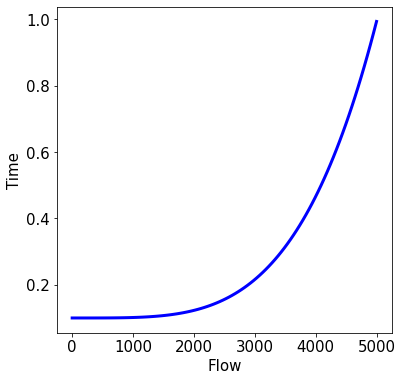

In [120]:
x = np.linspace(0, 5000, 100)
plt.plot(x, BPR(x), color='b', linewidth=3)
plt.xlabel("Flow")
plt.ylabel("Time")

Text(0, 0.5, 'Speed')

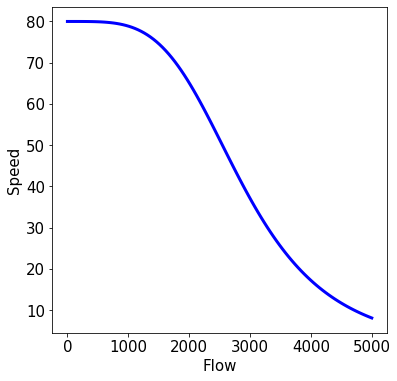

In [121]:
x = np.linspace(0, 5000, 100)
plt.plot(x, v(x), color='b', linewidth=3)
plt.xlabel("Flow")
plt.ylabel("Speed")

(array([28], dtype=int64),)

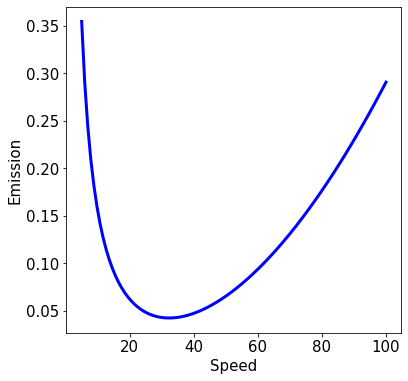

In [122]:
x = np.linspace(5, 100, 100)
plt.plot(x, e(x), color='b', linewidth=3)
plt.xlabel("Speed")
plt.ylabel("Emission")

# the emission-minimizing speed is
np.where(e(x) == np.min(e(x)))

Text(0, 0.5, 'Emission')

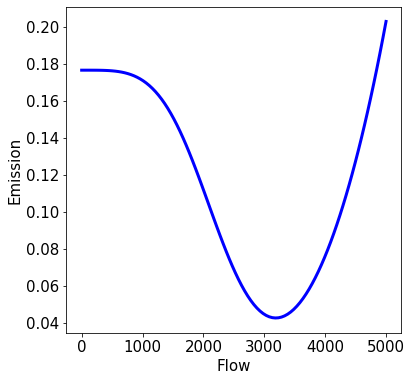

In [123]:
# non-monotonic
x = np.linspace(0, 5000, 100)
plt.plot(x, e(v(x)), color='b', linewidth=3)
plt.xlabel("Flow")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

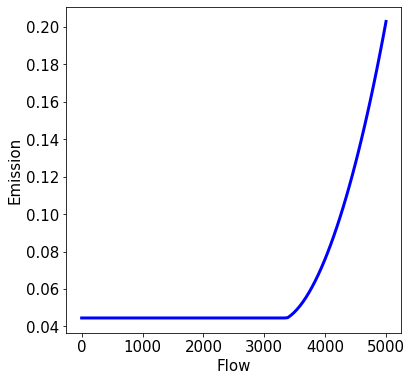

In [124]:
# impose a emission-minimizing speed limit to ensure the an non-decreasing emission function
x = np.linspace(0, 5000, 100)
plt.plot(x, e(v_lim(x)), color='b', linewidth=3)
plt.xlabel("Flow")
plt.ylabel("Emission")

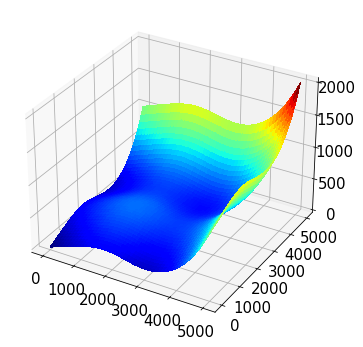

In [125]:
# Let's check the total emission of all vehicles (no speed limit), which equals flow * emission.
x1 = np.linspace(0, 5000, 100)
x2 = 5000 - x1
x, y = np.meshgrid(x1, x2)
z = np.zeros(np.shape(x))
for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
        z[i, j] = e(v(x[i, j])) * x[i, j] + e(v(y[i, j])) * y[i, j]

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z, cmap=plt.cm.jet, linewidth=0, antialiased=False)

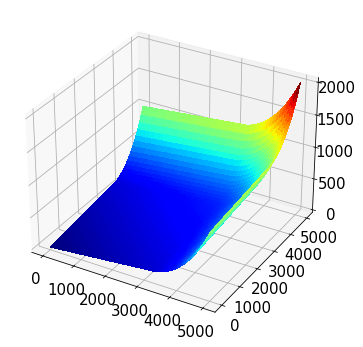

In [126]:
# Let's check the total emission of all vehicles (with speed limit), which equals flow * emission.
x1 = np.linspace(0, 5000, 100)
x2 = 5000 - x1
x, y = np.meshgrid(x1, x2)
z = np.zeros(np.shape(x))
for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
        z[i, j] = e(v_lim(x[i, j])) * x[i, j] + e(v_lim(y[i, j])) * y[i, j]

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z, cmap=plt.cm.jet, linewidth=0, antialiased=False)
# include a speed limit can ensure the weak convexity of the objective function.

### Reference: Tidswell, J., Downward, A., Thielen, C., & Raith, A. (2021). Minimising emissions in traffic assignment with non-monotonic arc costs. Transportation Research Part B: Methodological, 153, 70-90.